In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\COMMAT_classification sc\code\DATASET_ weka_679.csv")

In [3]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,630.0,1.50,0.0,0.25,0.0,0.0,80.0
1,1000.0,1.75,0.0,0.25,0.0,0.0,125.0
2,1500.0,2.50,0.0,0.25,0.0,0.0,175.0
3,1400.0,2.90,0.0,0.25,0.0,0.0,160.0
4,850.0,1.25,0.0,0.25,0.0,0.0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   SSA(m2/g)             558 non-null    float64
 1   Pore size(nm)         558 non-null    float64
 2   Pore Volume (cm3/g)   558 non-null    float64
 3   Potential             558 non-null    float64
 4   Nitrogen %            558 non-null    float64
 5   Id/Ig                 558 non-null    float64
 6   Specific Capacitance  558 non-null    float64
dtypes: float64(7)
memory usage: 30.6 KB


In [5]:
df['SSA(m2/g)'] = df['SSA(m2/g)']/1000

In [6]:
df.head()

,SSA(m2/g),Pore size(nm),Pore Volume (cm3/g),Potential,Nitrogen %,Id/Ig,Specific Capacitance
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [7]:
df = df.rename(columns={'SSA(m2/g)': 'SSA','Pore size(nm)': 'PS', 'Pore Volume (cm3/g)': 'PV' , 'Nitrogen %':'NC' ,  'Specific Capacitance':'SC'})

In [8]:
df.head()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
0,0.63,1.50,0.0,0.25,0.0,0.0,80.0
1,1.00,1.75,0.0,0.25,0.0,0.0,125.0
2,1.50,2.50,0.0,0.25,0.0,0.0,175.0
3,1.40,2.90,0.0,0.25,0.0,0.0,160.0
4,0.85,1.25,0.0,0.25,0.0,0.0,95.0


In [9]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

SSA          441
PS           177
PV           223
Potential     21
NC           129
Id/Ig        113
SC           330
dtype: int64

In [10]:
df.describe()

,SSA,PS,PV,Potential,NC,Id/Ig,SC
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000
mean,1.166802,1.714821,0.867994,1.296057,1.329385,0.555733,188.130824
std,0.883202,2.616503,0.861877,0.792527,2.875535,0.798127,104.478231
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.461500,0.000000,0.238000,1.000000,0.000000,0.000000,120.000000
50%,1.016700,0.900000,0.690000,1.000000,0.000000,0.000000,176.500000
75%,1.641000,2.522500,1.295000,1.000000,1.137500,0.997500,247.750000
max,4.073000,27.200000,5.910000,4.000000,19.800000,4.540000,587.000000


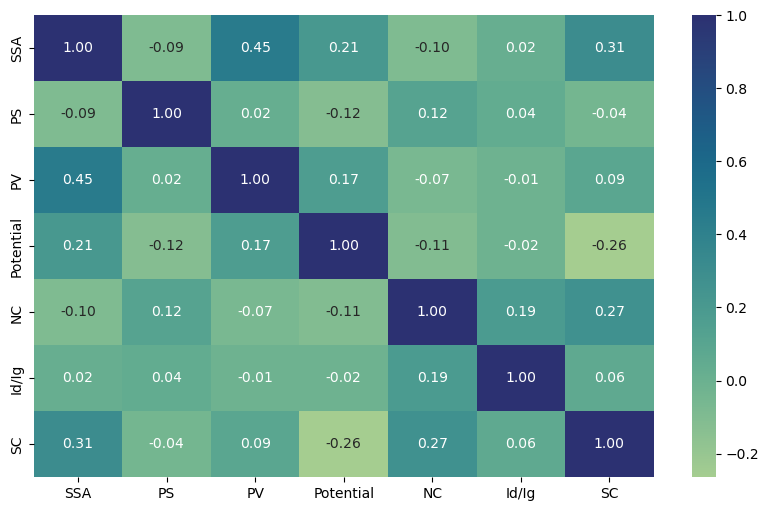

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
def assign_class(value):
    if value <= 138:
        return 1
    elif value <= 223:
        return 2
    else:
        return 3

df['Output_Class'] = df['SC'].apply(assign_class)
# Check the distribution of output classes
print("\nClass Distribution:")
print(df['Output_Class'].value_counts())


Class Distribution:
Output_Class
1    187
2    186
3    185
Name: count, dtype: int64


In [13]:
# split the data as df1,df2 and df3
df1 = df[df['Output_Class'] == 1]
df2 = df[df['Output_Class'] == 2]
df3 = df[df['Output_Class'] == 3]

In [14]:
#drop specific capacitance column for classification
# Drop column ''
dfop = df.drop(columns=['SC'])
#dfop = df.drop(columns=[df.columns[6]], inplace=True)
dfop.head()

,SSA,PS,PV,Potential,NC,Id/Ig,Output_Class
0,0.63,1.50,0.0,0.25,0.0,0.0,1
1,1.00,1.75,0.0,0.25,0.0,0.0,1
2,1.50,2.50,0.0,0.25,0.0,0.0,2
3,1.40,2.90,0.0,0.25,0.0,0.0,2
4,0.85,1.25,0.0,0.25,0.0,0.0,1


In [15]:
# Check Unique Values for each variable.
for i in dfop.columns:
  print(f"Unique {i}'s count:{dfop[i].nunique()}\n------------------------------------------")
  if i in dfop.columns:
    if(dfop[i].nunique() < 12):
      print(f"\n{dfop[i].unique()}\n------------------------------------------")
     

Unique SSA's count:441
------------------------------------------
Unique PS's count:177
------------------------------------------
Unique PV's count:223
------------------------------------------
Unique Potential's count:21
------------------------------------------
Unique NC's count:129
------------------------------------------
Unique Id/Ig's count:113
------------------------------------------
Unique Output_Class's count:3
------------------------------------------

[1 2 3]
------------------------------------------


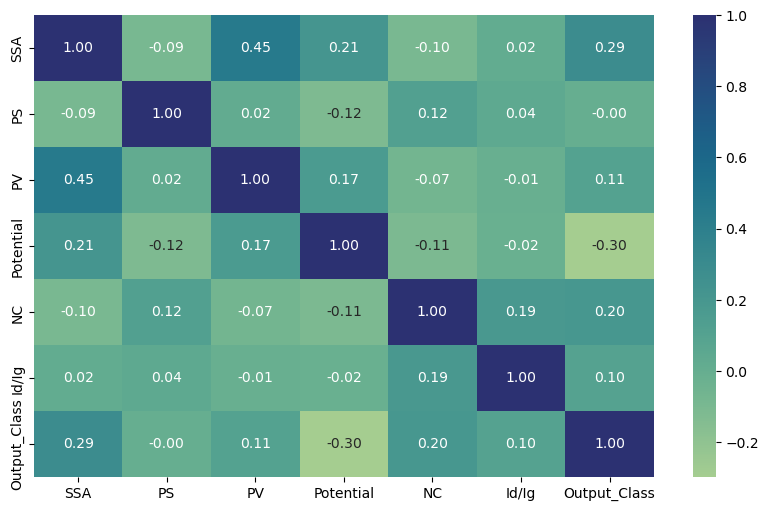

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(dfop.corr(numeric_only=True), annot=True, cmap="crest", fmt=".2f")
#plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
import os
print(os.getcwd())  # Shows the current working directory

C:\Users\HP\Desktop\Document\COMMAT\code


In [18]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, accuracy_score 

In [19]:
# To select all columns except the last one for X1, and the last column for y1 for  regression analysis of classes:
Xop = dfop.iloc[:, :-1]  # Select all columns except the last one for features (X1)
yop = dfop.iloc[:, -1]   # Select the last column as the target (y1)

In [20]:
Xop.head()

,SSA,PS,PV,Potential,NC,Id/Ig
0,0.63,1.50,0.0,0.25,0.0,0.0
1,1.00,1.75,0.0,0.25,0.0,0.0
2,1.50,2.50,0.0,0.25,0.0,0.0
3,1.40,2.90,0.0,0.25,0.0,0.0
4,0.85,1.25,0.0,0.25,0.0,0.0


In [21]:
yop.head()

0    1
1    1
2    2
3    2
4    1
Name: Output_Class, dtype: int64

In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split, learning_curve
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xop, yop, test_size=0.2, random_state=42)

In [23]:
#Scaler technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainc_scaler = scaler.fit_transform(X_trainc)
X_testc_scaler = scaler.transform(X_testc)

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             cohen_kappa_score, mean_squared_error,
                             mean_absolute_error, precision_score,
                             recall_score, f1_score)

# ---- Random Forest Classifier ----
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_trainc, y_trainc)

# ---- Predictions ----
y_predc = rf.predict(X_testc)

# ---- Error Metrics ----
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)

# ---- Classification Metrics ----
precision = precision_score(y_testc, y_predc, average='weighted')
recall = recall_score(y_testc, y_predc, average='weighted')
f1 = f1_score(y_testc, y_predc, average='weighted')
conf_mat = confusion_matrix(y_testc, y_predc)
class_report = classification_report(y_testc, y_predc)

# ---- Print Results ----
print("Performance Analysis (Random Forest Classifier)")
print("-" * 60)
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print("-" * 60)
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted):    {recall:.4f}")
print(f"F1 Score (Weighted):  {f1:.4f}")
print("-" * 60)
print("Confusion Matrix:")
print(conf_mat)
print("-" * 60)
print("Detailed Classification Report:")
print(class_report)


Performance Analysis (Random Forest Classifier)
------------------------------------------------------------
Root Mean Square Error (RMSE): 0.7734
Mean Absolute Error (MAE): 0.4732
Cohen's Kappa: 0.3845
------------------------------------------------------------
Precision (Weighted): 0.5849
Recall (Weighted):    0.5893
F1 Score (Weighted):  0.5842
------------------------------------------------------------
Confusion Matrix:
[[20  8  6]
 [14 20  9]
 [ 1  8 26]]
------------------------------------------------------------
Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.59      0.58        34
           2       0.56      0.47      0.51        43
           3       0.63      0.74      0.68        35

    accuracy                           0.59       112
   macro avg       0.59      0.60      0.59       112
weighted avg       0.58      0.59      0.58       112



In [26]:
rf1= RandomForestClassifier(max_depth = 5, n_estimators = 10, max_features = 1 )
rf1.fit(X_trainc, y_trainc)

# ---- Predictions ----
y_predc = rf1.predict(X_testc)

# ---- Error Metrics ----
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)

# ---- Classification Metrics ----
precision = precision_score(y_testc, y_predc, average='weighted')
recall = recall_score(y_testc, y_predc, average='weighted')
f1 = f1_score(y_testc, y_predc, average='weighted')
conf_mat = confusion_matrix(y_testc, y_predc)
class_report = classification_report(y_testc, y_predc)

# ---- Print Results ----
print("Performance Analysis (Random Forest Classifier second results)")
print("-" * 60)
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print("-" * 60)
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted):    {recall:.4f}")
print(f"F1 Score (Weighted):  {f1:.4f}")
print("-" * 60)
print("Confusion Matrix:")
print(conf_mat)
print("-" * 60)
print("Detailed Classification Report:")
print(class_report)


Performance Analysis (Random Forest Classifier second results)
------------------------------------------------------------
Root Mean Square Error (RMSE): 0.8183
Mean Absolute Error (MAE): 0.5268
Cohen's Kappa: 0.3219
------------------------------------------------------------
Precision (Weighted): 0.5371
Recall (Weighted):    0.5446
F1 Score (Weighted):  0.5328
------------------------------------------------------------
Confusion Matrix:
[[21  7  6]
 [16 15 12]
 [ 2  8 25]]
------------------------------------------------------------
Detailed Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.62      0.58        34
           2       0.50      0.35      0.41        43
           3       0.58      0.71      0.64        35

    accuracy                           0.54       112
   macro avg       0.54      0.56      0.54       112
weighted avg       0.54      0.54      0.53       112



In [29]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import make_scorer

# ---------------- Random Forest + Hyperparameter Tuning ----------------
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Custom scorer for Cohen's Kappa
kappa_scorer = make_scorer(cohen_kappa_score)

# Random Search tuned for kappa
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=50, cv=10, scoring=kappa_scorer,
    n_jobs=-1, random_state=42, verbose=1
)

# Fit model
rf_random_search.fit(X_trainc, y_trainc)

# Best model
best_rf = rf_random_search.best_estimator_
print("Best Hyperparameters:", rf_random_search.best_params_)

# ---------------- Evaluate Best Model ----------------
y_predc = best_rf.predict(X_testc)

# Error metrics
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)

print("\nPerformance Analysis (Random Forest Classifier random search tuned for Kappa)")
print("-" * 60)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cohen’s Kappa: {kappa:.4f}")
print("-" * 60)
print("Confusion Matrix:")
print(confusion_matrix(y_testc, y_predc))
print("-" * 60)
print("Classification Report:")
print(classification_report(y_testc, y_predc))


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 287}

Performance Analysis (Random Forest Classifier random search tuned for Kappa)
------------------------------------------------------------
RMSE: 0.7440
MAE: 0.4643
Cohen’s Kappa: 0.3709
------------------------------------------------------------
Confusion Matrix:
[[22  9  3]
 [16 19  8]
 [ 2  9 24]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.65      0.59        34
           2       0.51      0.44      0.48        43
           3       0.69      0.69      0.69        35

    accuracy                           0.58       112
   macro avg       0.58      0.59      0.59       112
weighted avg       0.58      0.58      0.58       112



In [31]:
from sklearn.metrics import accuracy_score
                             
# ---------------- Random Forest + Hyperparameter Tuning ----------------
rf = RandomForestClassifier(random_state=42)

# Define parameter distribution for Random Search
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Custom scorer for Cohen's Kappa
kappa_scorer = make_scorer(cohen_kappa_score)

# Random Search tuned for kappa
rf_random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=30, cv=10, scoring=kappa_scorer,
    n_jobs=-1, random_state=42, verbose=1
)

# Fit model
rf_random_search.fit(X_trainc, y_trainc)

# Best model
best_rf = rf_random_search.best_estimator_
print("Best Hyperparameters:", rf_random_search.best_params_)

# ---------------- Evaluate Best Model ----------------
y_predc = best_rf.predict(X_testc)

# Error metrics
rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
mae = mean_absolute_error(y_testc, y_predc)
kappa = cohen_kappa_score(y_testc, y_predc)
accuracy = accuracy_score(y_testc, y_predc)
print("\nPerformance Analysis (Random Forest Classifier random search tuned for Kappa 2nd time)")
print("-" * 60)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Cohen’s Kappa: {kappa:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print("-" * 60)
print("Confusion Matrix:")
print(confusion_matrix(y_testc, y_predc))
print("-" * 60)
print("Classification Report:")
print(classification_report(y_testc, y_predc))


Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 287}

Performance Analysis (Random Forest Classifier random search tuned for Kappa 2nd time)
------------------------------------------------------------
RMSE: 0.7440
MAE: 0.4643
Cohen’s Kappa: 0.3709
Accuracy: 0.5804
------------------------------------------------------------
Confusion Matrix:
[[22  9  3]
 [16 19  8]
 [ 2  9 24]]
------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.65      0.59        34
           2       0.51      0.44      0.48        43
           3       0.69      0.69      0.69        35

    accuracy                           0.58       112
   macro avg       0.58      0.59      0.59       112
weighted avg       0.58      0.58      0.58  